This is a notebook doing the entire pipeline of the preprocessing 

In [52]:
import numpy as np
import json
import glob
import os

# Define paths to the directories and files
data_root_directory = r'C:\Users\wille\AppData\Roaming\Godot\app_userdata\pilot_van_riet'
tooth_data_path = r'C:\Users\wille\OneDrive\Documenten\Tu Delft\Msc, Robotics\Afstuderen\AMC\Coding\thesis\descriptive_tooth_extraction\src\geometry\teeth_data.json'

# Load tooth data
with open(tooth_data_path, 'r') as file:
    tooth_data = json.load(file)

output_data_list = []
candidate_id = 0

# Iterate over all participant directories
for candidate_dir in glob.glob(os.path.join(data_root_directory, '*')):
    if os.path.isdir(candidate_dir):
        candidate_name = os.path.basename(candidate_dir)
        
        # Process each sensor data file that starts with 'extraction_data'
        for sensor_data_path in glob.glob(os.path.join(candidate_dir, 'extraction_data*.json')):
            with open(sensor_data_path, 'r') as file:
                sensor_data = json.load(file)

            # Initialize lists to store translated forces and torques
            translated_forces = []
            translated_torques = []

            # Extract relevant data from sensor_data
            quadrant = sensor_data["quadrant"]
            tooth = sensor_data["tooth"]
            person_type = sensor_data["person_type"]
            element_fractured = sensor_data["element_fractured"]
            start_timestamp = sensor_data["start_timestamp"]
            end_timestamp = sensor_data["end_timestamp"]
            epoxy_failed = sensor_data["epoxy_failed"]
            forceps_slipped = sensor_data["forceps_slipped"]
            format_version = sensor_data["format_version"]
            jaw_type = sensor_data["jaw_type"]
            nonrepresentative = sensor_data["nonrepresentative"]
            post_extraction_notes = sensor_data["post_extraction_notes"]

            # Form the key for accessing tooth data
            quadrant_key = f"Quadrant {quadrant}"
            tooth_key = str(tooth)

            # Extract relevant tooth data
            coordinates = np.array([tooth_data[quadrant_key][tooth_key]["coordinates"]["x"],
                                    tooth_data[quadrant_key][tooth_key]["coordinates"]["y"],
                                    tooth_data[quadrant_key][tooth_key]["coordinates"]["z"]])

            rotation = np.array(tooth_data[quadrant_key][tooth_key]["rotation"])

            # Extract forces and torques
            forces = np.array([sensor_data["raw_forces_x"],
                               sensor_data["raw_forces_y"],
                               sensor_data["raw_forces_z"]])

            torques = np.array([sensor_data["raw_torques_x"],
                                sensor_data["raw_torques_y"],
                                sensor_data["raw_torques_z"]])

            # Compute translated forces and torques
            for i in range(len(forces[0])):
                force_vector = forces[:, i]
                torque_vector = torques[:, i]

                # Translate forces (just rotation)
                translated_force = rotation.dot(force_vector)

                if quadrant in [1, 4]:
                    translated_force[1] *= -1  # Flip the y-component
                translated_forces.append(translated_force.tolist())

                # Initial translation and force correction. (try it out aswell)
                # translated_torque = rotation.dot(torque_vector) - np.cross(coordinates, translated_force)

                # Adjust torque for the force application point
                adjusted_torque_vector = torque_vector - np.cross(coordinates, force_vector)
                
                # Rotate the adjusted torque to the new frame
                translated_torque = rotation.dot(adjusted_torque_vector)

                if quadrant in [1, 4]:
                    translated_torque[1] *= -1  # Flip the y-component
                translated_torques.append(translated_torque.tolist())
            print(translated_torques[10])
            # Prepare the output data
            output_data = {
                "candidate_id": candidate_id,
                "candidate_name": candidate_name,
                "quadrant": quadrant,
                "tooth": tooth,
                "person_type": person_type,
                "element_fractured": element_fractured,
                "start_timestamp": start_timestamp,
                "end_timestamp": end_timestamp,
                "epoxy_failed": epoxy_failed,
                "forceps_slipped": forceps_slipped,
                "format_version": format_version,
                "jaw_type": jaw_type,
                "nonrepresentative": nonrepresentative,
                "post_extraction_notes": post_extraction_notes,
                "translated_forces_x": [f[0] for f in translated_forces],
                "translated_forces_y": [f[1] for f in translated_forces],
                "translated_forces_z": [f[2] for f in translated_forces],
                "translated_torques_x": [t[0] for t in translated_torques],
                "translated_torques_y": [t[1] for t in translated_torques],
                "translated_torques_z": [t[2] for t in translated_torques]
            }

            # Append the output data to the list
            output_data_list.append(output_data)
        
        # Increment the candidate ID for the next participant
        candidate_id += 1

print(len(output_data_list))


0


In [53]:
import numpy as np
import json
import glob
import os

# Define paths to the directories and files
data_root_directory = r'C:\Users\wille\AppData\Roaming\Godot\app_userdata'
tooth_data_path = r'C:\Users\wille\OneDrive\Documenten\Tu Delft\Msc, Robotics\Afstuderen\AMC\Coding\thesis\descriptive_tooth_extraction\src\geometry\teeth_data.json'

# Load tooth data
with open(tooth_data_path, 'r') as file:
    tooth_data = json.load(file)

output_data_list = []
candidate_id = 0

candidate_name = 'pilot_van_riet'  # Replace with the actual candidate's directory name
candidate_dir = os.path.join(data_root_directory, candidate_name)

# Process each sensor data file that starts with 'extraction_data'
for sensor_data_path in glob.glob(os.path.join(candidate_dir, 'extraction_data*.json')):
    with open(sensor_data_path, 'r') as file:
        sensor_data = json.load(file)

        # Initialize lists to store translated forces and torques
        translated_forces = []
        translated_torques = []

        # Extract relevant data from sensor_data
        quadrant = sensor_data["quadrant"]
        tooth = sensor_data["tooth"]
        person_type = sensor_data["person_type"]
        element_fractured = sensor_data["element_fractured"]
        start_timestamp = sensor_data["start_timestamp"]
        end_timestamp = sensor_data["end_timestamp"]
        epoxy_failed = sensor_data["epoxy_failed"]
        forceps_slipped = sensor_data["forceps_slipped"]
        format_version = sensor_data["format_version"]
        jaw_type = sensor_data["jaw_type"]
        nonrepresentative = sensor_data["nonrepresentative"]
        post_extraction_notes = sensor_data["post_extraction_notes"]

        # Form the key for accessing tooth data
        quadrant_key = f"Quadrant {quadrant}"
        tooth_key = str(tooth)

        # Extract relevant tooth data
        coordinates = np.array([tooth_data[quadrant_key][tooth_key]["coordinates"]["x"],
                                tooth_data[quadrant_key][tooth_key]["coordinates"]["y"],
                                tooth_data[quadrant_key][tooth_key]["coordinates"]["z"]])

        rotation = np.array(tooth_data[quadrant_key][tooth_key]["rotation"])

        # Extract forces and torques
        forces = np.array([sensor_data["raw_forces_x"],
                            sensor_data["raw_forces_y"],
                            sensor_data["raw_forces_z"]])

        torques = np.array([sensor_data["raw_torques_x"],
                            sensor_data["raw_torques_y"],
                            sensor_data["raw_torques_z"]])

        # Compute translated forces and torques
        for i in range(len(forces[0])):
            force_vector = forces[:, i]
            torque_vector = torques[:, i]

            # Translate forces (just rotation)
            translated_force = rotation.dot(force_vector)

            if quadrant in [1, 4]:
                translated_force[1] *= -1  # Flip the y-component
            translated_forces.append(translated_force.tolist())

            # Initial translation and force correction. (try it out aswell)
            # translated_torque = rotation.dot(torque_vector) - np.cross(coordinates, translated_force)

            # Adjust torque for the force application point
            adjusted_torque_vector = torque_vector - np.cross(coordinates, force_vector)
            
            # Rotate the adjusted torque to the new frame
            translated_torque = rotation.dot(adjusted_torque_vector)

            if quadrant in [1, 4]:
                translated_torque[1] *= -1  # Flip the y-component
            translated_torques.append(translated_torque.tolist())

        # Prepare the output data
        output_data = {
            "candidate_id": candidate_id,
            "candidate_name": candidate_name,
            "quadrant": quadrant,
            "tooth": tooth,
            "person_type": person_type,
            "element_fractured": element_fractured,
            "start_timestamp": start_timestamp,
            "end_timestamp": end_timestamp,
            "epoxy_failed": epoxy_failed,
            "forceps_slipped": forceps_slipped,
            "format_version": format_version,
            "jaw_type": jaw_type,
            "nonrepresentative": nonrepresentative,
            "post_extraction_notes": post_extraction_notes,
            "translated_forces_x": [f[0] for f in translated_forces],
            "translated_forces_y": [f[1] for f in translated_forces],
            "translated_forces_z": [f[2] for f in translated_forces],
            "translated_torques_x": [t[0] for t in translated_torques],
            "translated_torques_y": [t[1] for t in translated_torques],
            "translated_torques_z": [t[2] for t in translated_torques]
        }

        # Append the output data to the list
        output_data_list.append(output_data)
    
    # Increment the candidate ID for the next participant
    candidate_id += 1

print(len(output_data_list))


63


3
4
Number of data points: 17323
Recording duration: 17.488999843597412 seconds
Sampling frequency: 990.5083283731526 Hz


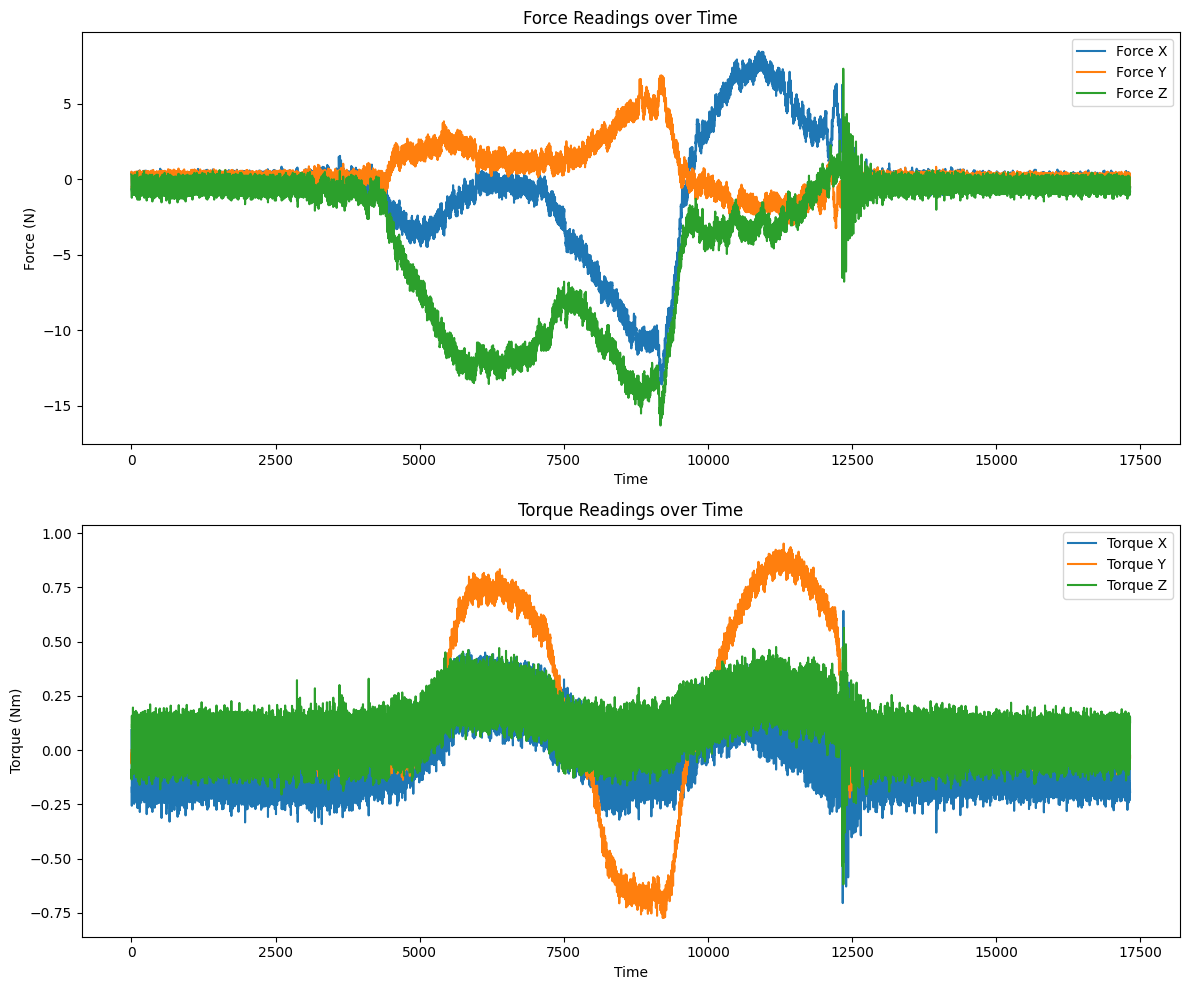

In [54]:
import matplotlib.pyplot as plt

def plot_sensor_data_from_json(data):
    def prepare_data(data):
        print(f"Number of data points: {len(data['translated_forces_x'])}")
        duration = data['end_timestamp'] - data['start_timestamp']
        frequency = len(data['translated_forces_x']) / duration
        print(f"Recording duration: {duration} seconds")
        print(f"Sampling frequency: {frequency} Hz")

        raw_forces = [data['translated_forces_x'], data['translated_forces_y'], data['translated_forces_z']]
        raw_torques = [data['translated_torques_x'], data['translated_torques_y'], data['translated_torques_z']]
        return np.array(raw_forces + raw_torques).T

    # Load sensor data
    sensor_data = prepare_data(data)

    # Plotting the data
    force_labels = ['Force X', 'Force Y', 'Force Z']
    torque_labels = ['Torque X', 'Torque Y', 'Torque Z']

    # Create a new figure for each plot
    plt.figure(figsize=(12, 10))

    # Time-series Plot for Forces
    plt.subplot(2, 1, 1)
    for i in range(3):
        plt.plot(sensor_data[:, i], label=force_labels[i])
    plt.title('Force Readings over Time')
    plt.xlabel('Time')
    plt.ylabel('Force (N)')
    plt.legend()

    # Time-series Plot for Torques
    plt.subplot(2, 1, 2)
    for i in range(3, 6):
        plt.plot(sensor_data[:, i], label=torque_labels[i - 3])
    plt.title('Torque Readings over Time')
    plt.xlabel('Time')
    plt.ylabel('Torque (Nm)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example use
run = 4

print(output_data_list[run]["quadrant"])
print(output_data_list[run]["tooth"])
plot_sensor_data_from_json(output_data_list[run])


In [55]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter specifications
fs = 700  # Sampling frequency
cutoff = 1  # Cutoff frequency in Hz
order = 5  # Order of the filter

# Prepare the filter coefficients
b, a = butter_lowpass(cutoff, fs, order=order)

filtered_data = []
# Assume output_data_list is a list of dictionaries, each with keys like "translated_forces_x", etc.
for original_data in output_data_list:
    # Convert data to a numpy array
    sensor_data = np.array([
        original_data['translated_forces_x'],
        original_data['translated_forces_y'],
        original_data['translated_forces_z'],
        original_data['translated_torques_x'],
        original_data['translated_torques_y'],
        original_data['translated_torques_z']
    ]).T  # Transpose to make sure dimensions match expectation for lfilter

    # Apply the filter
    sensor_data_filtered = lfilter(b, a, sensor_data, axis=0)

    # Update the original data dictionary with filtered data
    original_data.update({
        "translated_forces_x": sensor_data_filtered[:, 0].tolist(),
        "translated_forces_y": sensor_data_filtered[:, 1].tolist(),
        "translated_forces_z": sensor_data_filtered[:, 2].tolist(),
        "translated_torques_x": sensor_data_filtered[:, 3].tolist(),
        "translated_torques_y": sensor_data_filtered[:, 4].tolist(),
        "translated_torques_z": sensor_data_filtered[:, 5].tolist()
    })

    filtered_data.append(original_data)


pilot_van_riet
Number of data points: 13229
Recording duration: 13.359000205993652 seconds
Sampling frequency: 990.2687174197866 Hz


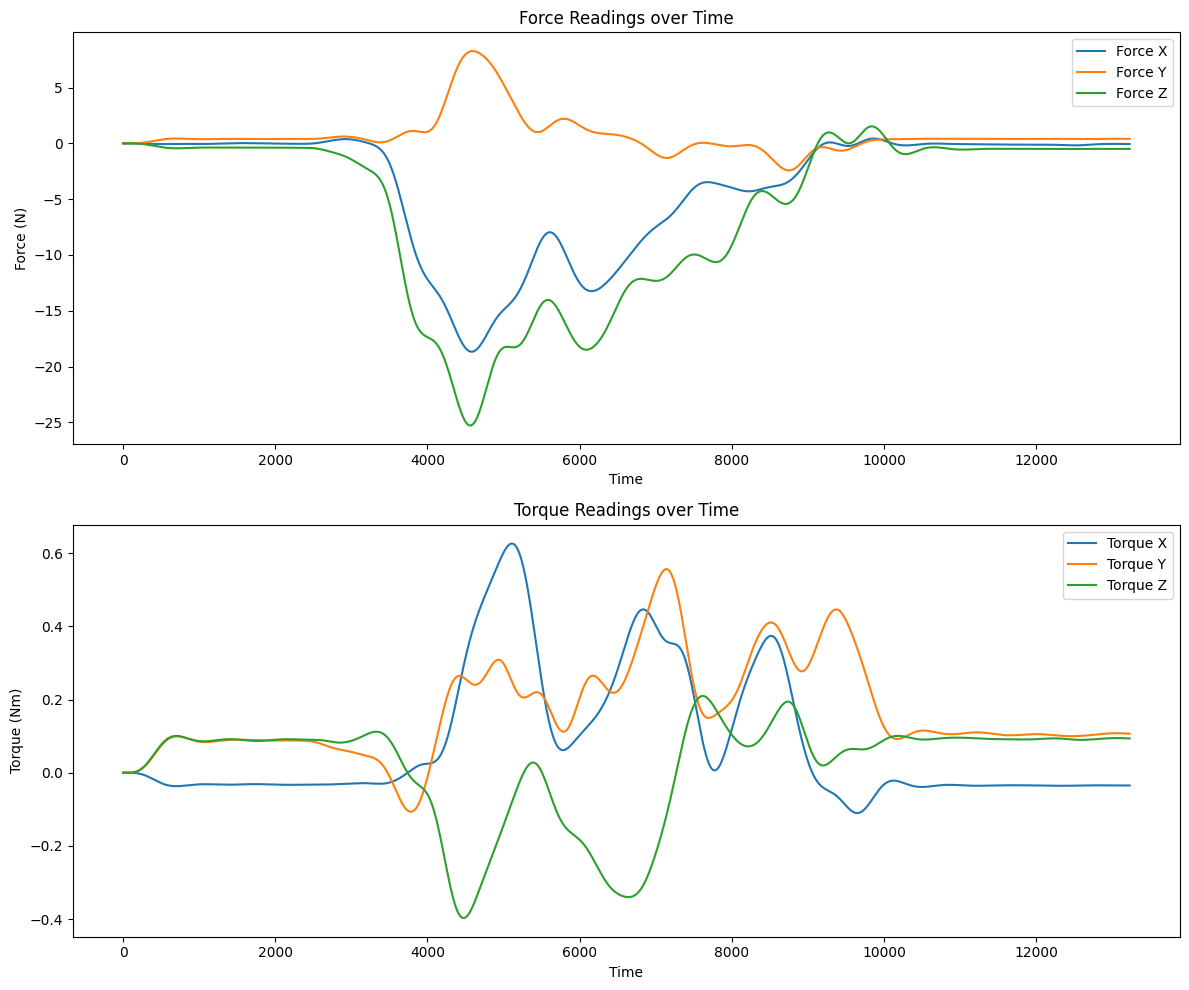

In [56]:
run = 46
print(filtered_data[run]["candidate_name"])
plot_sensor_data_from_json(filtered_data[run])

In [57]:
import numpy as np

def detect_procedure_limits(sensor_data, threshold=0.01, look_back=10, look_forward=10):
    # Calculate the gradient of sensor data
    gradients = np.abs(np.gradient(sensor_data, axis=0))
    # Detect start
    start_indices = np.where((gradients > threshold).any(axis=1))[0]
    start_index = max(start_indices[0] - look_back, 0) if start_indices.size > 0 else 0
    # Detect end
    reversed_gradients = np.abs(np.gradient(sensor_data[::-1], axis=0))
    end_indices = np.where((reversed_gradients > threshold).any(axis=1))[0]
    end_index = len(sensor_data) - end_indices[0] + look_forward if end_indices.size > 0 else len(sensor_data)
    return start_index, end_index



def process_sensor_data(data_list):
    result_list = []
    for original_data in data_list:
        sensor_data = np.array([
            original_data['translated_forces_x'],
            original_data['translated_forces_y'],
            original_data['translated_forces_z'],
            original_data['translated_torques_x'],
            original_data['translated_torques_y'],
            original_data['translated_torques_z']
        ]).T  # Transpose to align with the dimensions expected by the analysis functions

        # Detect start and end indices for procedure
        start_index, end_index = detect_procedure_limits(sensor_data)

        # Cut the sensor data to these indices
        sensor_data_cut = sensor_data[start_index:end_index]

        # Update the original data dictionary with the new sliced data
        original_data.update({
            "translated_forces_x": sensor_data_cut[:, 0].tolist(),
            "translated_forces_y": sensor_data_cut[:, 1].tolist(),
            "translated_forces_z": sensor_data_cut[:, 2].tolist(),
            "translated_torques_x": sensor_data_cut[:, 3].tolist(),
            "translated_torques_y": sensor_data_cut[:, 4].tolist(),
            "translated_torques_z": sensor_data_cut[:, 5].tolist(),
            "procedure_start": start_index,
            "procedure_end": end_index
        })
        result_list.append(original_data)

    return result_list

cutted_data = process_sensor_data(filtered_data)
print(len(cutted_data))
# plot_sensor_data_from_json(cutted_data[0])

63


3
5
Number of data points: 12909
Recording duration: 17.675000190734863 seconds
Sampling frequency: 730.353598907842 Hz


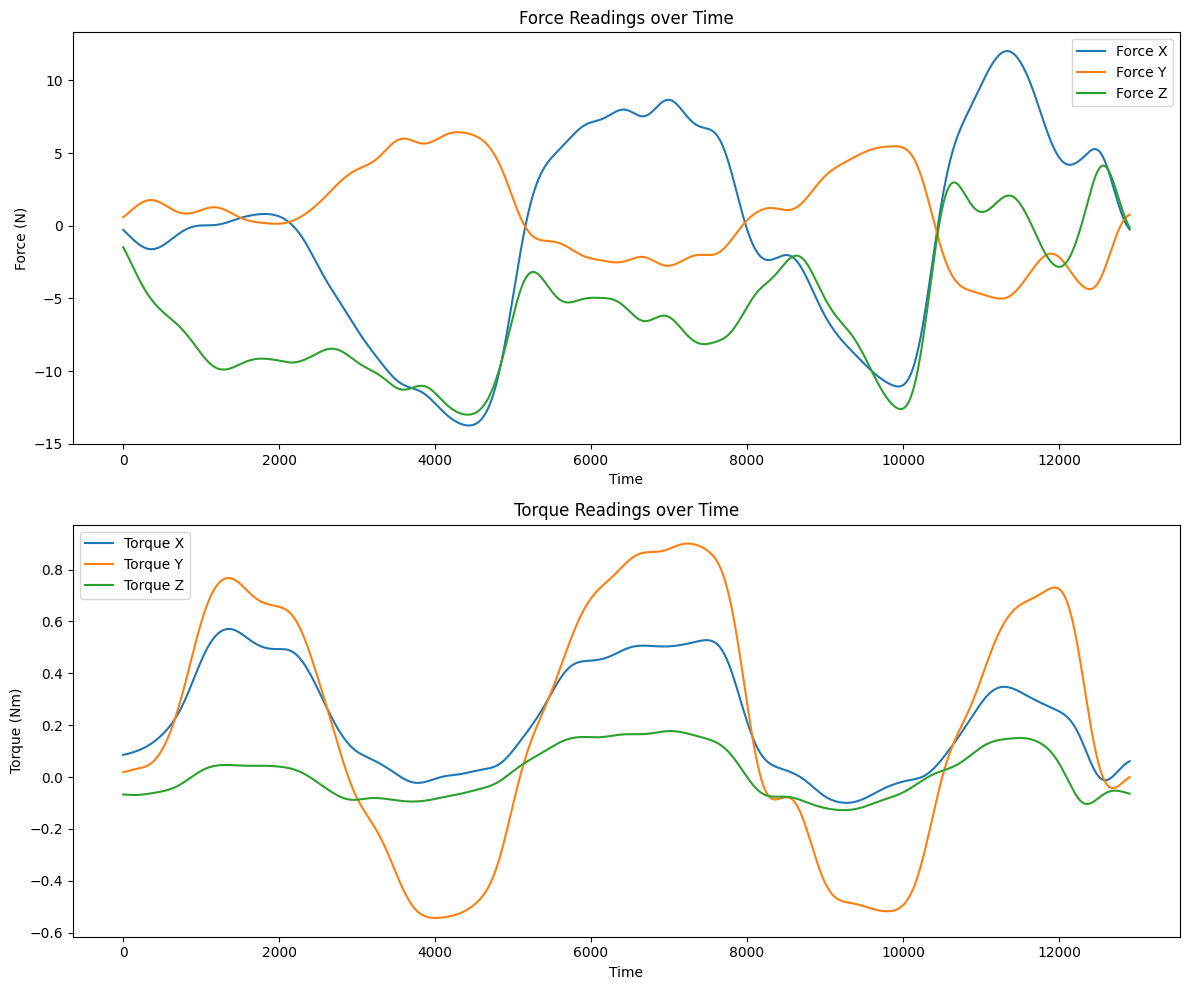

Number of data points: 12909
Recording duration: 17.675000190734863 seconds
Sampling frequency: 730.353598907842 Hz


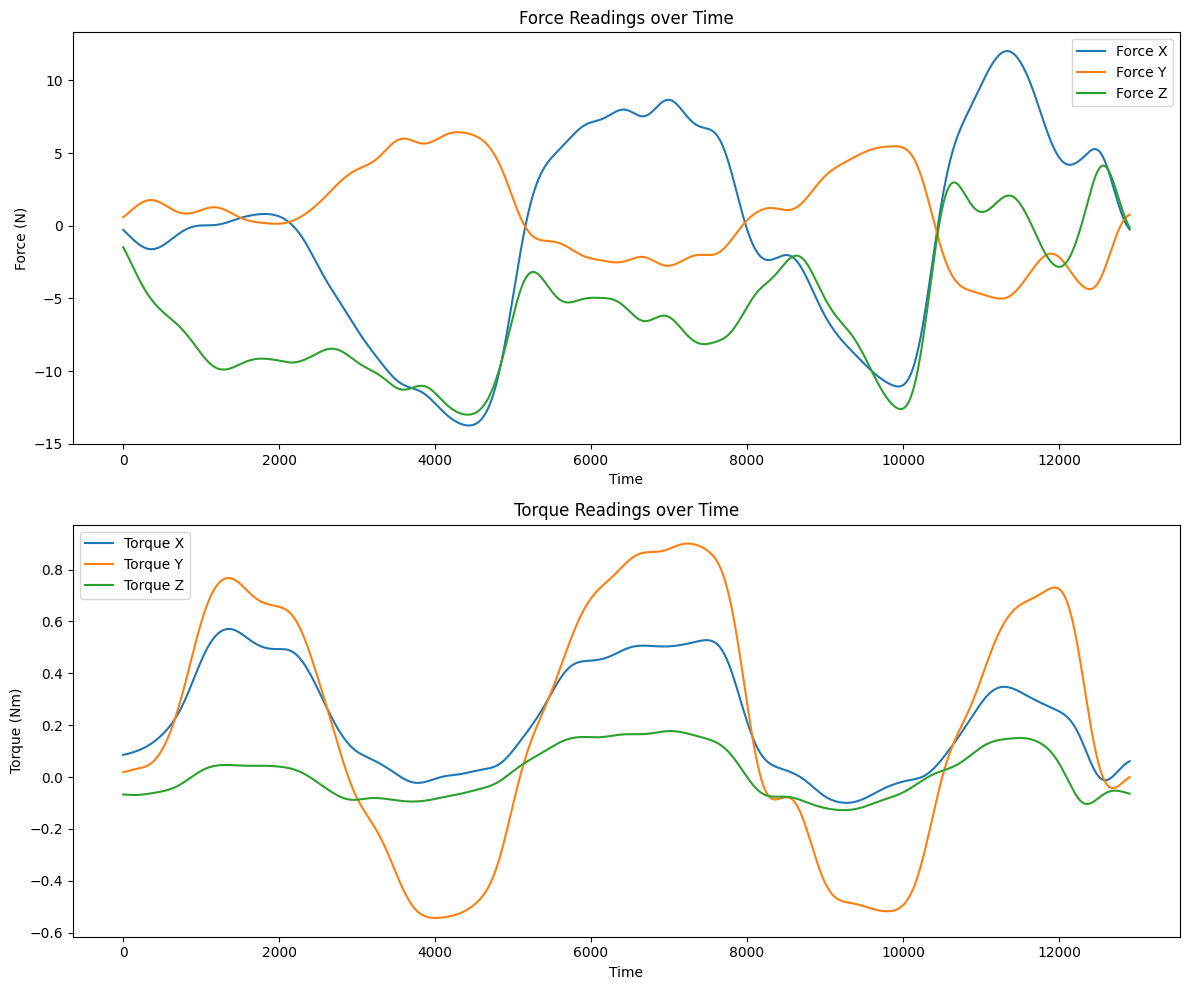

In [58]:
run = 3

print(filtered_data[run]["quadrant"])
print(filtered_data[run]["tooth"])


plot_sensor_data_from_json(filtered_data[run])
plot_sensor_data_from_json(cutted_data[run])

In [59]:
# now please tranlate the cutted data into a panda's object dictionary
import pandas as pd

def convert_to_pandas(data_list):
    result = {}
    for i, data in enumerate(data_list):
        df = pd.DataFrame(data)
        df['timestamp'] = range(len(df))
        result[i] = df
    return result

pandas_data = convert_to_pandas(cutted_data)


#please show the head of the data
pandas_data[run].head()


,candidate_id,candidate_name,quadrant,tooth,person_type,element_fractured,start_timestamp,end_timestamp,epoxy_failed,forceps_slipped,...,post_extraction_notes,translated_forces_x,translated_forces_y,translated_forces_z,translated_torques_x,translated_torques_y,translated_torques_z,procedure_start,procedure_end,timestamp
0,3,pilot_van_riet,3,5,Student,False,1.719481e+09,1.719482e+09,False,False,...,,-0.282279,0.587143,-1.478288,0.085378,0.018710,-0.067262,3039,15948,0
1,3,pilot_van_riet,3,5,Student,False,1.719481e+09,1.719482e+09,False,False,...,,-0.287312,0.591066,-1.488057,0.085442,0.018788,-0.067280,3039,15948,1
2,3,pilot_van_riet,3,5,Student,False,1.719481e+09,1.719482e+09,False,False,...,,-0.292355,0.595005,-1.497855,0.085507,0.018867,-0.067297,3039,15948,2
3,3,pilot_van_riet,3,5,Student,False,1.719481e+09,1.719482e+09,False,False,...,,-0.297408,0.598961,-1.507679,0.085571,0.018946,-0.067314,3039,15948,3
4,3,pilot_van_riet,3,5,Student,False,1.719481e+09,1.719482e+09,False,False,...,,-0.302470,0.602933,-1.517531,0.085636,0.019025,-0.067331,3039,15948,4


In [60]:
import numpy as np
from scipy.integrate import simps
from numpy import gradient
import pandas as pd

def compute_metrics(data, dt):
    # Initialize the metrics dictionary
    metrics = {}

    # Calculate Peak Plus
    metrics['PEAK+'] = np.max(data, axis=0)

    # Calculate Peak Minus
    metrics['PEAK-'] = -np.min(data, axis=0)

    # Calculate Peak to Peak
    metrics['PP'] = metrics['PEAK+'] + metrics['PEAK-']

    # Calculate Integrated Absolute Value
    metrics['INTABS'] = simps(np.abs(data), dx=dt, axis=0)

    # Calculate DER (derivative)
    dx_dt = gradient(data, axis=0, edge_order=2)
    metrics['DER'] = np.sqrt(simps(dx_dt**2, dx=dt, axis=0))

    # Calculate Mean Absolute Nonzero Force (MANF)
    threshold = 0.1  # Define a threshold for 'nonzero' force
    nonzero_data = data[np.any(np.abs(data) > threshold, axis=1)]
    metrics['MANF'] = np.mean(np.abs(nonzero_data), axis=0)

    # PCA related calculations for Force Volume
    if data.shape[1] == 3:  # Ensure data has three components
        cov_matrix = np.cov(data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        std_deviations = np.sqrt(eigenvalues[sorted_indices])
        metrics['FV'] = (4/3) * np.pi * np.prod(std_deviations)

    return metrics

def add_metrics_to_dataframe(pandas_data, dt):
    metrics_list = []
    
    # Itereer over alle pandas DataFrames in de dictionary
    for run, df in pandas_data.items():
        # Bereken de metrics voor krachten en koppels
        force_data = df[['translated_forces_x', 'translated_forces_y', 'translated_forces_z']].values
        torque_data = df[['translated_torques_x', 'translated_torques_y', 'translated_torques_z']].values

        force_metrics = compute_metrics(force_data, dt)
        torque_metrics = compute_metrics(torque_data, dt)
        
        # Combineer force_metrics en torque_metrics in één dictionary
        combined_metrics = {f'force_{k}': v for k, v in force_metrics.items()}
        combined_metrics.update({f'torque_{k}': v for k, v in torque_metrics.items()})
        
        # Voeg de metadata toe aan de metrics dictionary
        combined_metrics.update({
            "candidate_id": df["candidate_id"].iloc[0],
            "candidate_name": df["candidate_name"].iloc[0],
            "quadrant": df["quadrant"].iloc[0],
            "tooth": df["tooth"].iloc[0],
            "person_type": df["person_type"].iloc[0],
            "element_fractured": df["element_fractured"].iloc[0],
            "start_timestamp": df["start_timestamp"].iloc[0],
            "end_timestamp": df["end_timestamp"].iloc[0],
            "epoxy_failed": df["epoxy_failed"].iloc[0],
            "forceps_slipped": df["forceps_slipped"].iloc[0],
            "format_version": df["format_version"].iloc[0],
            "jaw_type": df["jaw_type"].iloc[0],
            "nonrepresentative": df["nonrepresentative"].iloc[0],
            "post_extraction_notes": df["post_extraction_notes"].iloc[0]
        })

        # Voeg de combined_metrics toe aan de lijst
        metrics_list.append(combined_metrics)

    # Converteer de lijst met dictionaries naar een pandas DataFrame
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

# Stel de sample interval (dt) in
dt = 1 / 990  # Bijv. 990 Hz sample frequentie

# Voeg de berekende metrics toe aan de DataFrame
metrics_df = add_metrics_to_dataframe(pandas_data, dt)

# Print de eerste paar rijen van de metrics DataFrame om te verifiëren
print(metrics_df.head(1))

total_rows = len(metrics_df)
print(f"Total number of rows in metrics_df: {total_rows}")


                                         force_PEAK+  \
0  [11.991579517232877, 3.5591029147398783, 2.129...   

                                         force_PEAK-  \
0  [12.304301549710162, 2.546477068950329, 12.470...   

                                            force_PP  \
0  [24.29588106694304, 6.105579983690207, 14.5995...   

                                        force_INTABS  \
0  [134.15251123849916, 35.438886854074, 176.0273...   

                                           force_DER  \
0  [0.03708086811343761, 0.014745390853080147, 0....   

                                          force_MANF  force_FV  \
0  [5.310551419569352, 1.402916103054973, 6.96824...  48.78359   

                                        torque_PEAK+  \
0  [0.41407088962924055, 0.9910995638545972, 0.19...   

                                        torque_PEAK-  \
0  [-0.04232421000007559, 0.6654042086060288, 0.0...   

                                           torque_PP  ... person_type  \
0  

Aantal rijen in pca_features (quadrant 1 en 2): 32
Aantal rijen in pca_features (quadrant 3 en 4): 31


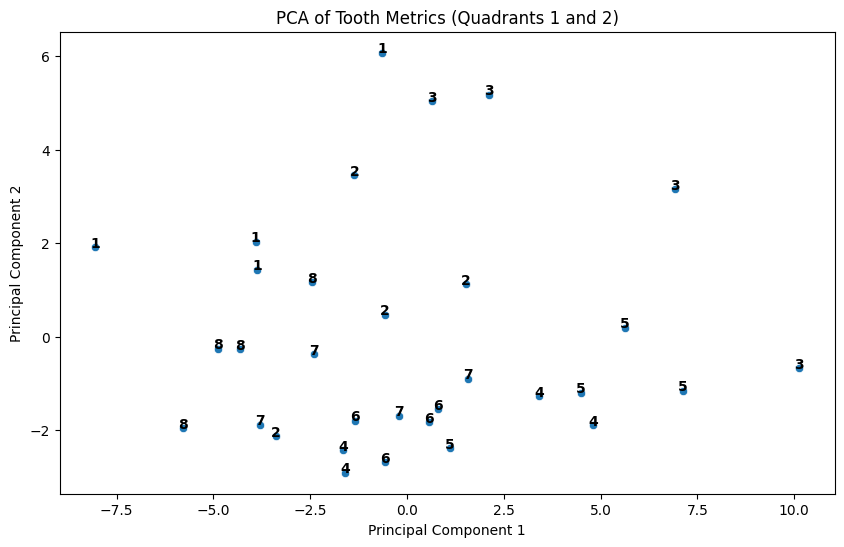

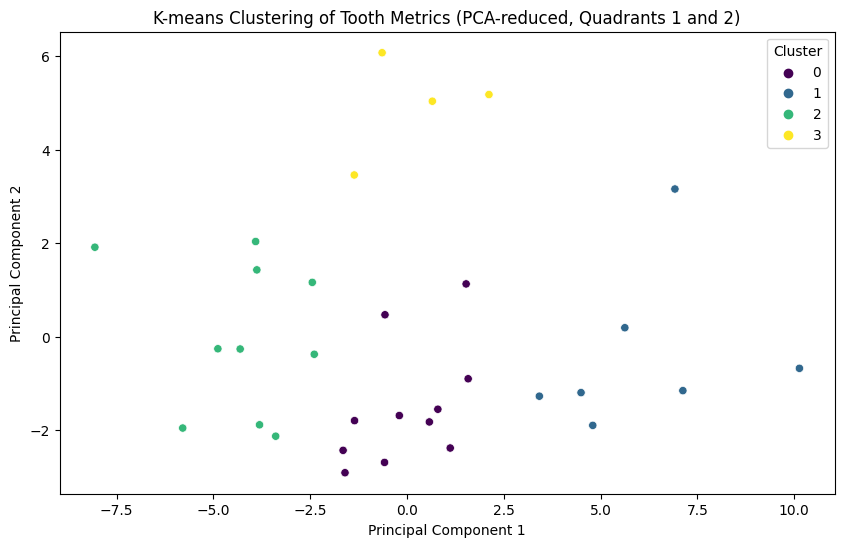

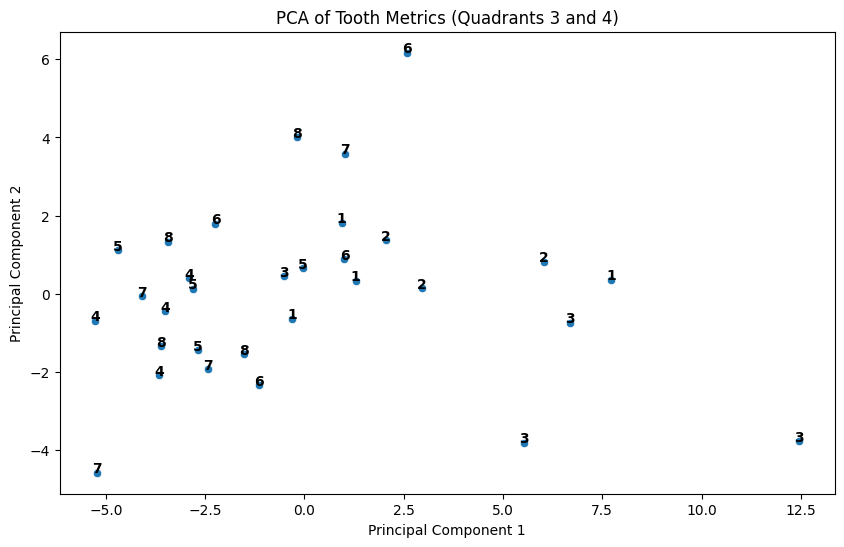

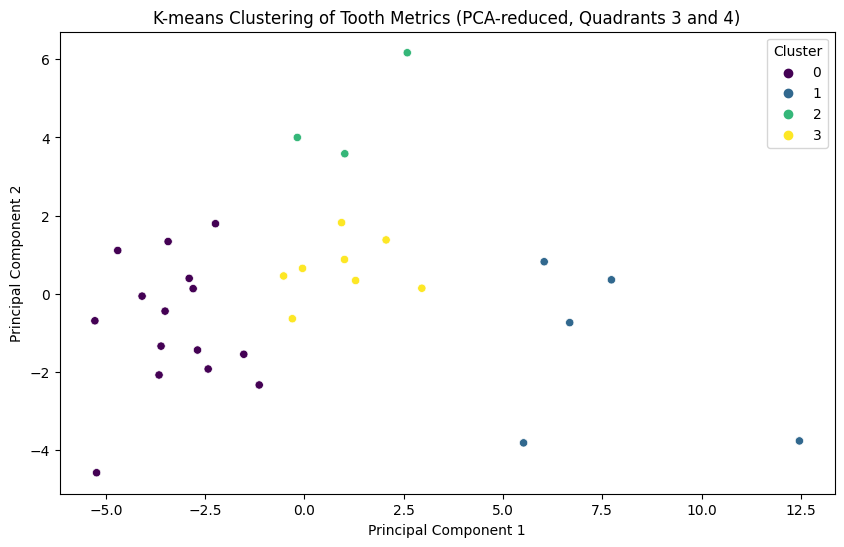

Quadranten 1 en 2
Tooth 1: Cluster 2 (Represents 30.00% of the cluster)
Tooth 2: Cluster 3 (Represents 25.00% of the cluster)
Tooth 3: Cluster 3 (Represents 50.00% of the cluster)
Tooth 4: Cluster 1 (Represents 28.57% of the cluster)
Tooth 5: Cluster 1 (Represents 42.86% of the cluster)
Tooth 6: Cluster 0 (Represents 36.36% of the cluster)
Tooth 7: Cluster 2 (Represents 20.00% of the cluster)
Tooth 8: Cluster 2 (Represents 40.00% of the cluster)

Quadranten 3 en 4
Tooth 1: Cluster 3 (Represents 37.50% of the cluster)
Tooth 2: Cluster 3 (Represents 25.00% of the cluster)
Tooth 3: Cluster 1 (Represents 60.00% of the cluster)
Tooth 4: Cluster 0 (Represents 26.67% of the cluster)
Tooth 5: Cluster 0 (Represents 20.00% of the cluster)
Tooth 6: Cluster 2 (Represents 33.33% of the cluster)
Tooth 7: Cluster 2 (Represents 33.33% of the cluster)
Tooth 8: Cluster 2 (Represents 33.33% of the cluster)
   tooth_quadrant  cluster
62         1 (Q1)        2
46         1 (Q1)        2
54         1 (Q2) 

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Functie om kolommen met lijstwaarden op te splitsen in afzonderlijke kolommen
def split_list_columns(df, columns):
    for col in columns:
        if col in df.columns:
            split_df = pd.DataFrame(df[col].tolist(), index=df.index)
            split_df.columns = [f'{col}_{i}' for i in range(split_df.shape[1])]
            df = pd.concat([df, split_df], axis=1)
            df.drop(columns=[col], inplace=True)
    return df

# Definieer de kolommen die moeten worden opgesplitst
list_columns = ['force_PEAK+', 'force_PEAK-', 'force_PP', 'force_INTABS', 'force_DER', 'force_MANF', 
                'torque_PEAK+', 'torque_PEAK-', 'torque_PP', 'torque_INTABS', 'torque_DER', 'torque_MANF']

# Split de kolommen in metrics_df
metrics_df = split_list_columns(metrics_df, list_columns)

# Definieer de kolommen voor clustering op basis van de beschikbare kolommen
available_columns = ['force_PEAK+_0', 'force_PEAK+_1', 'force_PEAK+_2', 
                     'force_PEAK-_0', 'force_PEAK-_1', 'force_PEAK-_2', 
                     'force_PP_0', 'force_PP_1', 'force_PP_2', 
                     'force_INTABS_0', 'force_INTABS_1', 'force_INTABS_2', 
                     'force_DER_0', 'force_DER_1', 'force_DER_2', 
                     'force_MANF_0', 'force_MANF_1', 'force_MANF_2', 
                     'torque_PEAK+_0', 'torque_PEAK+_1', 'torque_PEAK+_2', 
                     'torque_PEAK-_0', 'torque_PEAK-_1', 'torque_PEAK-_2', 
                     'torque_PP_0', 'torque_PP_1', 'torque_PP_2', 
                     'torque_INTABS_0', 'torque_INTABS_1', 'torque_INTABS_2', 
                     'torque_DER_0', 'torque_DER_1', 'torque_DER_2', 
                     'torque_MANF_0', 'torque_MANF_1', 'torque_MANF_2', 
                     'force_FV', 'torque_FV']

# Controleer welke kolommen beschikbaar zijn in metrics_df
available_columns = [col for col in available_columns if col in metrics_df.columns]

# Functie om clustering uit te voeren
def perform_clustering(data, n_clusters=4):
    # Combineer de beschikbare kolommen voor clustering
    features = data[available_columns]

    # Normaliseer de kenmerken
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Pas PCA toe
    pca = PCA(n_components=2)  # Reduceer tot 2 componenten voor visualisatie
    pca_features = pca.fit_transform(scaled_features)

    # Voeg de PCA componenten toe aan de DataFrame voor visualisatie
    data['pca_1'] = pca_features[:, 0]
    data['pca_2'] = pca_features[:, 1]

    # Pas K-means clustering toe op de PCA-getransformeerde data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(pca_features)

    return data, pca_features

# Voer clustering uit voor kwadranten 1 en 2
quadrant_1_2_df = metrics_df[metrics_df['quadrant'].isin([1, 2])].copy()
quadrant_1_2_df, pca_features_1_2 = perform_clustering(quadrant_1_2_df)

# Voer clustering uit voor kwadranten 3 en 4
quadrant_3_4_df = metrics_df[metrics_df['quadrant'].isin([3, 4])].copy()
quadrant_3_4_df, pca_features_3_4 = perform_clustering(quadrant_3_4_df)

# Combineer de resultaten voor de uiteindelijke afdruk
combined_df = pd.concat([quadrant_1_2_df, quadrant_3_4_df])

# Controleer het aantal rijen in pca_features
print("Aantal rijen in pca_features (quadrant 1 en 2):", len(pca_features_1_2))
print("Aantal rijen in pca_features (quadrant 3 en 4):", len(pca_features_3_4))


# Visualiseer de punten na PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=quadrant_1_2_df, x='pca_1', y='pca_2')
for i in range(quadrant_1_2_df.shape[0]):
    plt.text(quadrant_1_2_df['pca_1'].iloc[i], quadrant_1_2_df['pca_2'].iloc[i], quadrant_1_2_df['tooth'].iloc[i], 
                horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PCA of Tooth Metrics (Quadrants 1 and 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Visualiseer de clustering resultaten voor kwadranten 1 en 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=quadrant_1_2_df, x='pca_1', y='pca_2', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Tooth Metrics (PCA-reduced, Quadrants 1 and 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



# Visualiseer de punten na PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=quadrant_3_4_df, x='pca_1', y='pca_2')
for i in range(quadrant_3_4_df.shape[0]):
    plt.text(quadrant_3_4_df['pca_1'].iloc[i], quadrant_3_4_df['pca_2'].iloc[i], quadrant_3_4_df['tooth'].iloc[i], 
                horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PCA of Tooth Metrics (Quadrants 3 and 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Visualiseer de clustering resultaten voor kwadranten 3 en 4
plt.figure(figsize=(10, 6))
sns.scatterplot(data=quadrant_3_4_df, x='pca_1', y='pca_2', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Tooth Metrics (PCA-reduced, Quadrants 3 and 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Voer clustering uit voor kwadranten 1 en 2
quadrant_1_2_df = metrics_df[metrics_df['quadrant'].isin([1, 2])].copy()
quadrant_1_2_df, pca_features_1_2 = perform_clustering(quadrant_1_2_df)

# Voer clustering uit voor kwadranten 3 en 4
quadrant_3_4_df = metrics_df[metrics_df['quadrant'].isin([3, 4])].copy()
quadrant_3_4_df, pca_features_3_4 = perform_clustering(quadrant_3_4_df)

def print_clusters_per_tooth(df, quadrants):
    print(f"Quadranten {quadrants[0]} en {quadrants[1]}")
    total_counts = df['cluster'].value_counts()
    for tooth in range(1, 9):
        clusters = df[df['tooth'] == tooth]['cluster'].value_counts()
        percentages = (clusters / total_counts * 100).sort_values(ascending=False)
        most_representative_cluster = percentages.idxmax() if not percentages.empty else 'N/A'
        print(f"Tooth {tooth}: Cluster {most_representative_cluster} (Represents {percentages[most_representative_cluster]:.2f}% of the cluster)")



# # Functie om de clusters per tand en kwadrant te printen
# def print_clusters_per_tooth(df, quadrants):
#     print(f"Quadranten {quadrants[0]} en {quadrants[1]}")
#     for tooth in range(1, 9):
#         clusters = df[df['tooth'] == tooth]['cluster'].value_counts()
#         most_common_cluster = clusters.idxmax() if not clusters.empty else 'N/A'
#         print(f"Tooth {tooth}: Cluster {most_common_cluster}")

# Print de clusters per tand en kwadrant
print_clusters_per_tooth(quadrant_1_2_df, [1, 2])
print()
print_clusters_per_tooth(quadrant_3_4_df, [3, 4])

# Print de tand, kwadrant en de cluster waarin ze zich bevinden
combined_df = pd.concat([quadrant_1_2_df, quadrant_3_4_df])
combined_df['tooth_quadrant'] = combined_df['tooth'].astype(str) + ' (Q' + combined_df['quadrant'].astype(str) + ')'
result = combined_df[['tooth_quadrant', 'cluster']].sort_values(by=['tooth_quadrant'])
print(result)


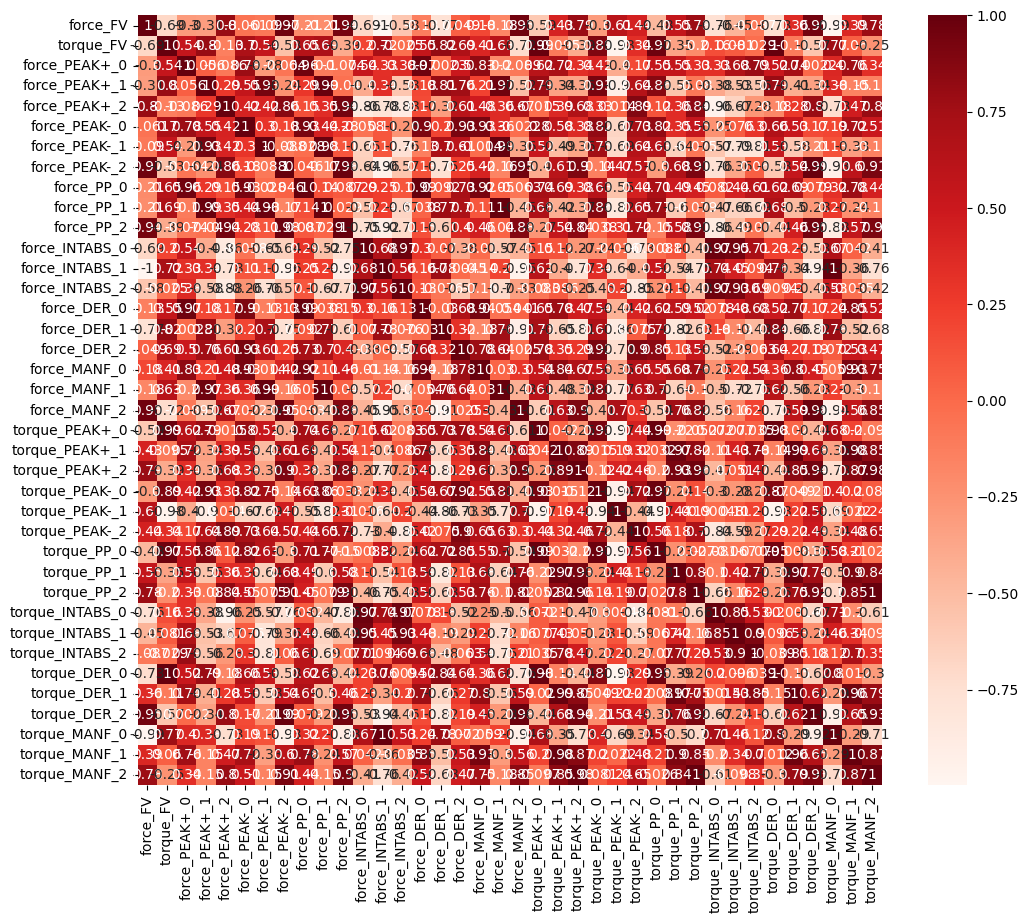

Sterk gecorreleerde kenmerken (correlatie > 0.9): [('force_FV', 'force_PEAK-_2'), ('force_FV', 'force_PP_2'), ('force_FV', 'force_MANF_2'), ('force_FV', 'torque_DER_2'), ('torque_FV', 'torque_PEAK+_0'), ('torque_FV', 'torque_PP_0'), ('torque_FV', 'torque_DER_0'), ('force_PEAK+_0', 'force_PP_0'), ('force_PEAK+_0', 'force_DER_0'), ('force_PEAK+_1', 'force_PEAK-_1'), ('force_PEAK+_1', 'force_PP_1'), ('force_PEAK+_1', 'force_MANF_1'), ('force_PEAK+_1', 'torque_PEAK-_0'), ('force_PEAK+_2', 'force_PP_2'), ('force_PEAK-_0', 'force_PP_0'), ('force_PEAK-_0', 'force_DER_0'), ('force_PEAK-_0', 'force_DER_2'), ('force_PEAK-_0', 'force_MANF_0'), ('force_PEAK-_1', 'force_PP_1'), ('force_PEAK-_1', 'force_MANF_1'), ('force_PEAK-_2', 'force_PP_2'), ('force_PEAK-_2', 'force_MANF_2'), ('force_PEAK-_2', 'torque_PEAK+_2'), ('force_PEAK-_2', 'torque_PP_2'), ('force_PEAK-_2', 'torque_DER_2'), ('force_PEAK-_2', 'torque_MANF_2'), ('force_PP_0', 'force_DER_0'), ('force_PP_0', 'force_MANF_0'), ('force_PP_1', 'fo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Functie om de force en torque vectoren te splitsen
def split_vector_columns(df, column_prefixes):
    for prefix in column_prefixes:
        for i in range(3):
            df[f"{prefix}_{i}"] = df[prefix].apply(lambda x: x[i])
        df.drop(columns=[prefix], inplace=True)
    return df

# Lijst van kolommen met vector waarden die gesplitst moeten worden
vector_columns = [
    'force_PEAK+', 'force_PEAK-', 'force_PP', 'force_INTABS', 'force_DER', 'force_MANF',
    'torque_PEAK+', 'torque_PEAK-', 'torque_PP', 'torque_INTABS', 'torque_DER', 'torque_MANF'
]

# Split de vector kolommen in afzonderlijke kolommen
metrics_df = split_vector_columns(metrics_df, vector_columns)

# Toevoegen van labels
metrics_df['label'] = metrics_df['candidate_id'].apply(lambda x: 0 if x in [0, 1] else 1 if x in [2, 3] else np.nan)

# Verwijder rijen zonder geldige labels
metrics_df = metrics_df.dropna(subset=['label'])

# Split de data in features (X) en labels (y)
X = metrics_df.drop(['label', 'candidate_id', 'candidate_name', 'quadrant', 'tooth', 'person_type', 'element_fractured', 'start_timestamp', 'end_timestamp', 'epoxy_failed', 'forceps_slipped', 'format_version', 'jaw_type', 'nonrepresentative', 'post_extraction_notes'], axis=1)
y = metrics_df['label']

# Normaliseren van de data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Omzetten naar een DataFrame voor eenvoudiger gebruik
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Correlation Matrix
corr_matrix = X_normalized.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Identificeren van sterk gecorreleerde kenmerken
high_corr_var = np.where(corr_matrix > 0.9)
redundant_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Sterk gecorreleerde kenmerken (correlatie > 0.9):", redundant_features)

# Verwijder één feature uit elk paar van sterk gecorreleerde features
features_to_drop = set([pair[0] for pair in redundant_features])
X_reduced = X_normalized.drop(columns=features_to_drop)

# Univariate Feature Selection
selector = SelectKBest(f_classif, k=10)
selector.fit(X_reduced, y)
selected_features = X_reduced.columns[selector.get_support(indices=True)]
print("Top 10 Univariate Features:", selected_features)

# Recursive Feature Elimination
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_reduced, y)
rfe_features = X_reduced.columns[fit.support_]
print("Top 10 RFE Features:", rfe_features)

# Feature Importance from Random Forest
model.fit(X_reduced, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [X_reduced.columns[i] for i in indices[:10]]
print("Top 10 Feature Importances from Random Forest:", top_features)

# Vergelijk de resultaten
common_features = set(rfe_features).intersection(set(top_features))
print("Common Features:", common_features)
